## training with two hidden layer

$$
  z_i = S(u_i) \\
  u_i = w_{ij} z_j \\
  z_j = S(u_j) \\
  u_j = w_{jk} z_k \\
  z_k = S(u_k) \\
  u_k = w_{kl} z_l
$$

$$
  \mu
$$

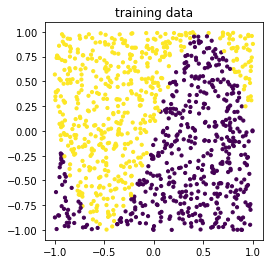

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import graphviz
from graphviz import Digraph

ALPHA     = 1.0e-1
BATCHSIZE = 5
MAX_EPOCH = 2000
OUT_EPOCH = 50
TYPE      = "sin" # x, circle, stripe, chess, diagonal, occ (off-centered-circle), sin

url = "https://raw.githubusercontent.com/daiki-matsunaga/MathMeasurement/main/lec06/data/"

def Sigmoid(vec):
    return 1.0/(1.0 + np.exp(-vec))

class FeedForward():
    def __init__(self):
        np.random.seed(3) # set random seed

        self.data    = np.loadtxt(url + TYPE + "/training.dat") # read data
        self.numData = self.data.shape[0]                       # number of data
#        self.numData = 500                                      # number of data
        self.l2      = []                                       # l2 time history

        self.num_i = 1  # number of output layer
        self.num_j = 4  # number of hidden layer 1
        self.num_k = 4  # number of hidden layer 2
        self.num_l = 2  # number of input layer

        # set random weight
        self.w_ij = np.random.normal(0.0, 5.0, (self.num_i, self.num_j))
        self.w_jk = np.random.normal(0.0, 5.0, (self.num_j, self.num_k))
        self.w_kl = np.random.normal(0.0, 5.0, (self.num_k, self.num_l))

        # show training data
        fig, ax = plt.subplots()
        ax.scatter(self.data[:self.numData, 0], self.data[:self.numData, 1], c=self.data[:self.numData, 2], s = 10.0)
        ax.set_aspect('equal')
        ax.set_title('training data')
        plt.show()

    def Forward(self, zl):
        zk = Sigmoid(self.w_kl@zl)  # layer l -> layer k
        zj = Sigmoid(self.w_jk@zk)  # layer k -> layer j
        zi = Sigmoid(self.w_ij@zj)  # layer j -> layer i (output layer)
        return zi, zj, zk, zl

    def UpdateWeight(self):
        l2 = 0.0 # initialize L2 error

        # initialize derivative 
        d_w_ij = np.zeros([self.num_i, self.num_j])
        d_w_jk = np.zeros([self.num_j, self.num_k])
        d_w_kl = np.zeros([self.num_k, self.num_l])

        for idd in range(self.numData): 
            zi, zj, zk, zl = self.Forward([self.data[idd, 0], self.data[idd, 1]]) # forward propagation
            ti = self.data[idd, 2]                                                # read test data
            l2 += (zi - ti)**2.0/self.numData                                     # calculate l2 error

            # backward propagation
            e_ui = (zi - ti)*zi*(1.0 - zi) 
            e_uj = e_ui*self.w_ij[0]*zj*(1.0 - zj)
            e_uk = np.einsum('j,jk->k', e_uj, self.w_jk)*zk*(1.0 - zk)

            d_w_ij += e_ui*zj
            d_w_jk += np.einsum('j,k->jk', e_uj, zk)
            d_w_kl += np.einsum('k,l->kl', e_uk, zl)
            
            if idd%BATCHSIZE == 0: 
                self.w_ij -= ALPHA*d_w_ij
                self.w_jk -= ALPHA*d_w_jk
                self.w_kl -= ALPHA*d_w_kl
                
                d_w_ij.fill(0.0)
                d_w_jk.fill(0.0)
                d_w_kl.fill(0.0)

        self.l2.append(l2)
        return l2


ml = FeedForward() # constructor

Epoch     0 - L2 error: 2.913936e-01
Epoch    50 - L2 error: 4.232341e-02
Epoch   100 - L2 error: 3.210505e-02
Epoch   150 - L2 error: 2.748177e-02
Epoch   200 - L2 error: 2.516783e-02
Epoch   250 - L2 error: 2.365659e-02
Epoch   300 - L2 error: 2.245373e-02
Epoch   350 - L2 error: 2.143714e-02
Epoch   400 - L2 error: 2.057121e-02
Epoch   450 - L2 error: 1.984293e-02
Epoch   500 - L2 error: 1.924578e-02
Epoch   550 - L2 error: 1.875805e-02
Epoch   600 - L2 error: 1.834565e-02
Epoch   650 - L2 error: 1.797788e-02
Epoch   700 - L2 error: 1.764541e-02
Epoch   750 - L2 error: 1.734813e-02
Epoch   800 - L2 error: 1.708034e-02
Epoch   850 - L2 error: 1.683592e-02
Epoch   900 - L2 error: 1.661076e-02
Epoch   950 - L2 error: 1.640055e-02
Epoch  1000 - L2 error: 1.620076e-02
Epoch  1050 - L2 error: 1.600790e-02
Epoch  1100 - L2 error: 1.582025e-02
Epoch  1150 - L2 error: 1.563890e-02
Epoch  1200 - L2 error: 1.546845e-02
Epoch  1250 - L2 error: 1.531493e-02
Epoch  1300 - L2 error: 1.518102e-02
E

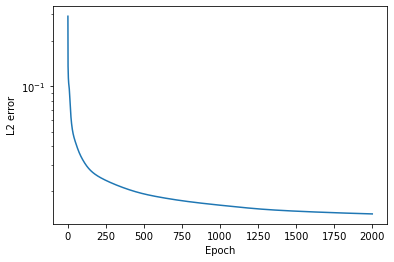

In [7]:
for epoch in range(MAX_EPOCH+1): # training
    l2 = ml.UpdateWeight()
    if(epoch%OUT_EPOCH == 0): print("Epoch %5d - L2 error: %e" % (epoch, l2))

fig, ax = plt.subplots() # show training process
ax.plot(ml.l2)
ax.set_xlabel("Epoch")
ax.set_ylabel("L2 error")
ax.set_yscale('log')
plt.show()

Test data - L2 error: [0.01707975]
Test data - correct rate: 0.98

 w_ij = 
 [[ 19.92651946  21.33203201 -10.62634219 -20.81406636]]

 w_jk = 
 [[ 10.28237132  -2.18930561  -1.96094594  -5.73888323]
 [  7.10147564  -9.1689801  -23.40838214  11.75748264]
 [  4.14135445   8.58975081   0.77877016  -2.11501524]
 [-12.27143776 -12.28130367  14.7638637  -15.74855844]]

 w_kl = 
 [[-23.10949416   7.99218257]
 [  5.12801714   0.64536097]
 [ -2.17607272  -1.19443048]
 [  2.28695899   0.81849313]]


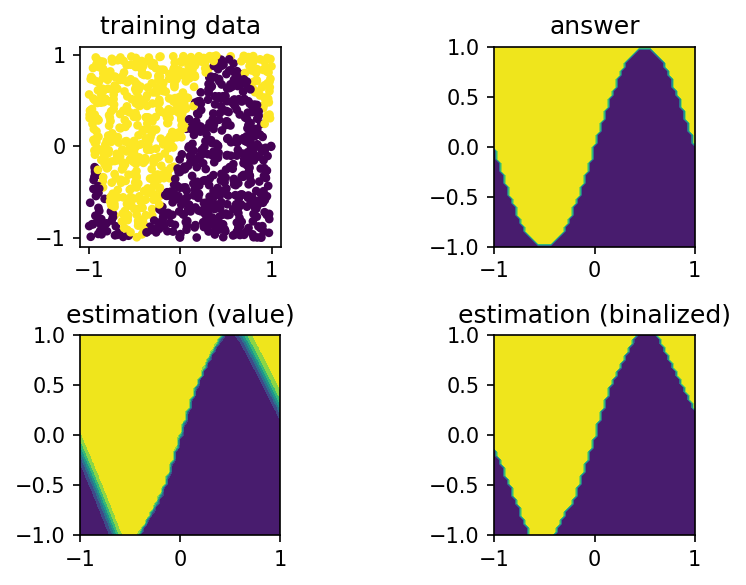

In [11]:
# test
test = np.loadtxt(url + TYPE + "/test.dat") # read test data
numTestData = test.shape[0]
tx, ty, label = test[:, 0], test[:, 1], test[:, 2]

l2 = 0.0 # initialize L2 error
count = 0
y   = np.array([])
zis = np.array([])

for td in test: 
    # forward
    zi, zj, zk, zl = ml.Forward([td[0], td[1]])

    ti = td[2]              # read test data
    yi = 1.0 if zi > 0.5 else 0.0

    y = np.append(y, yi)
    zis = np.append(zis, zi)

    # add l2 error
    l2 += (zi - ti)**2.0/numTestData
    count += 1 if ti == yi else 0

print("Test data - L2 error:", l2)
print("Test data - correct rate: %.2f" % (count/numTestData))

print("\n w_ij = \n", ml.w_ij)
print("\n w_jk = \n", ml.w_jk)
print("\n w_kl = \n", ml.w_kl)

# show training data
fig, ax = plt.subplots(2, 2)
fig.set_dpi(150)
ax[0,0].scatter(ml.data[:ml.numData, 0], ml.data[:ml.numData, 1], c=ml.data[:ml.numData, 2], s = 10.0)
ax[0,0].set_aspect('equal')
ax[0,0].set_title('training data')

ax[0,1].contourf(tx.reshape(51, 51), ty.reshape(51, 51), label.reshape(51, 51), vmin=0, vmax=1)
ax[0,1].set_aspect('equal')
ax[0,1].set_title('answer')

ax[1,0].contourf(tx.reshape(51, 51), ty.reshape(51, 51), zis.reshape(51, 51), vmin=0, vmax=1)
ax[1,0].set_aspect('equal')
ax[1,0].set_title('estimation (value)')

ax[1,1].contourf(tx.reshape(51, 51), ty.reshape(51, 51), y.reshape(51, 51), vmin=0, vmax=1)
ax[1,1].set_aspect('equal')
ax[1,1].set_title('estimation (binalized)')

fig.tight_layout()
plt.show()

In [20]:
g = Digraph()

scale = 0.2
g.attr('node', shape='circle', fontsize="9", labelfontsize="1")

for l in range(ml.num_l): 
    for k in range(ml.num_k): 
        if ml.w_kl[k, l] >= 0.0:
            g.edge('zl' + str(l), 'zk' + str(k), penwidth=str(scale*abs(ml.w_kl[k, l])), color="red") #, label=str("%.2f" % w_ij[j]))
        else:
            g.edge('zl' + str(l), 'zk' + str(k), penwidth=str(scale*abs(ml.w_kl[k, l])), color="blue") #, label=str("%.2f" % w_ij[j]))

for k in range(ml.num_k): 
    for j in range(ml.num_j): 
        if ml.w_jk[j, k] >= 0.0:
            g.edge('zk' + str(k), 'zj' + str(j), penwidth=str(scale*abs(ml.w_jk[j, k])), color="red") #, label=str("%.2f" % w_ij[j]))
        else:
            g.edge('zk' + str(k), 'zj' + str(j), penwidth=str(scale*abs(ml.w_jk[j, k])), color="blue") #, label=str("%.2f" % w_ij[j]))

for j in range(ml.num_j): 
    for i in range(ml.num_i): 
        if ml.w_ij[i, j] >= 0.0:
            g.edge('zj' + str(j), 'zi' + str(i), penwidth=str(scale*abs(ml.w_ij[i, j])), color="red") #, label=str("%.2f" % w_ij[j]))
        else:
            g.edge('zj' + str(j), 'zi' + str(i), penwidth=str(scale*abs(ml.w_ij[i, j])), color="blue") #, label=str("%.2f" % w_ij[j]), fontsize="5")

g.view()
#gvz = graphviz.Source(g).view()
#display(gvz)

'Digraph.gv.pdf'